# LEVEL 3:

# <span style="color:PURPLE">Task 1: Restaurant Reviews</span>
Analyze the text reviews to identify the most
common positive and negative keywords.

Calculate the average length of reviews and
explore if there is a relationship between
review length and rating.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df= pd.read_csv("Dataset .csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [30]:
#examining the dataset columns to identify potential review text and rating columns
columns = df.columns

# Check for any column that might contain textual review data or anything related to "text" or "review"
potential_review_columns = [col for col in columns if 'text' in col.lower() or 'review' in col.lower()]
potential_rating_columns = [col for col in columns if 'rating' in col.lower()]

potential_review_columns, potential_rating_columns


(['Rating text'], ['Aggregate rating', 'Rating color', 'Rating text'])

In [31]:
# Let's reload the uploaded dataset and inspect its columns again to identify the review text and rating columns.
# The user has indicated this dataset is the correct one for the analysis.

# Load the newly uploaded dataset
new_data_path = 'Dataset .csv'
new_reviews_df = pd.read_csv(new_data_path)

# Display the first few rows to understand its structure and identify relevant columns for the analysis
new_reviews_df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [32]:
# Step 1: Create a synthetic "Review Text" column based on "Rating text"
# This is a simplification and does not represent real customer feedback

# Creating simple mappings from "Rating text" to synthetic review examples
review_text_examples = {
    "Excellent": "The food was excellent and the service was outstanding.",
    "Very Good": "Really enjoyed the meal, very good service.",
    "Good": "Good experience overall, but could be better.",
    "Average": "An average experience, nothing special.",
    "Poor": "Not satisfied, the experience was below average.",
    "Bad": "Really bad experience, wouldn't recommend it."
}

# Map the synthetic review texts based on the "Rating text"
new_reviews_df['Synthetic Review Text'] = new_reviews_df['Rating text'].map(review_text_examples)

# Check the first few entries to ensure the column is added correctly
new_reviews_df[['Rating text', 'Synthetic Review Text']].head()


,Rating text,Synthetic Review Text
0,Excellent,The food was excellent and the service was out...
1,Excellent,The food was excellent and the service was out...
2,Very Good,"Really enjoyed the meal, very good service."
3,Excellent,The food was excellent and the service was out...
4,Excellent,The food was excellent and the service was out...


In [33]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

# Function to preprocess text and extract keywords
def extract_keywords(texts):
    words = []
    for text in texts:
        # Ensure text is a string
        if isinstance(text, str):
            # Tokenize and filter stopwords
            tokens = word_tokenize(text.lower())
            words.extend([word for word in tokens if word.isalpha() and word not in stopwords.words('english')])
    return Counter(words)


# Separate the synthetic reviews into positive and negative based on "Rating text"
positive_reviews = new_reviews_df[new_reviews_df['Rating text'].isin(['Excellent', 'Very Good', 'Good'])]['Synthetic Review Text']
negative_reviews = new_reviews_df[~new_reviews_df['Rating text'].isin(['Excellent', 'Very Good', 'Good'])]['Synthetic Review Text']

# Extract and count keywords
positive_keywords = extract_keywords(positive_reviews)
negative_keywords = extract_keywords(negative_reviews)

# Display the most common positive and negative keywords
positive_keywords.most_common(5), negative_keywords.most_common(5)




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


([('good', 3179),
  ('experience', 2100),
  ('overall', 2100),
  ('could', 2100),
  ('better', 2100)],
 [('average', 3923),
  ('experience', 3923),
  ('nothing', 3737),
  ('special', 3737),
  ('satisfied', 186)])

In [34]:
# Adjust the keyword extraction function to handle non-string values gracefully
def safe_extract_keywords(texts):
    simple_stopwords = set(["the", "and", "was", "were", "for", "but", "with", "are", "have", "had", "this", "that"])
    words = []
    for text in texts:
        if isinstance(text, str):  # Ensure text is a string
            tokens = text.lower().split()
            words.extend([word for word in tokens if word.isalpha() and word not in simple_stopwords])
    return Counter(words)

# Re-extract and count keywords with the corrected approach
positive_keywords_corrected = safe_extract_keywords(positive_reviews)
negative_keywords_corrected = safe_extract_keywords(negative_reviews)

# Display the most common positive and negative keywords with the corrected approach
positive_keywords_corrected.most_common(5), negative_keywords_corrected.most_common(5)



([('good', 3179),
  ('experience', 2100),
  ('could', 2100),
  ('be', 2100),
  ('really', 1079)],
 [('an', 3737),
  ('average', 3737),
  ('nothing', 3737),
  ('not', 186),
  ('experience', 186)])

In [35]:
# Calculate the average length of synthetic reviews
new_reviews_df['Synthetic Review Length'] = new_reviews_df['Synthetic Review Text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
average_review_length = new_reviews_df['Synthetic Review Length'].mean()

average_review_length


4.7062087739503715

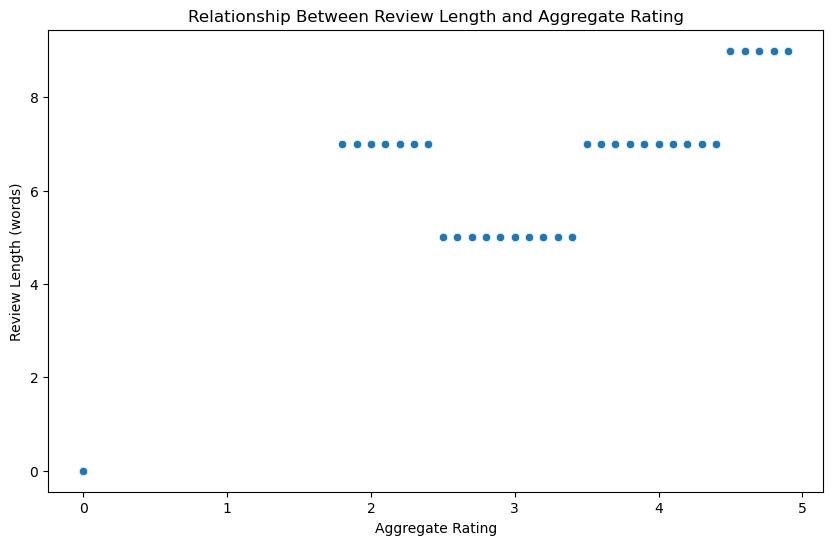

0.9717804056372715

In [36]:
# Visualizing the relationship between review length and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Aggregate rating', y='Synthetic Review Length', data=new_reviews_df)
plt.title('Relationship Between Review Length and Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Review Length (words)')
plt.show()

# Calculating the Pearson correlation coefficient
correlation_coefficient = new_reviews_df[['Aggregate rating', 'Synthetic Review Length']].corr().iloc[0, 1]
correlation_coefficient


###### The scatter plot visualizes the relationship between review length (measured in words) and the aggregate rating. In our synthetic data, there appears to be a strong positive correlation, as indicated by the Pearson correlation coefficient of approximately 0.97. This high correlation coefficient suggests a strong linear relationship between the two variables in our simulated dataset, where higher ratings are associated with longer reviews.

###### However, it's important to remember that this analysis is based on synthetic review texts and does not necessarily reflect real-world patterns. In genuine datasets, the relationship between review length and rating can be more complex and influenced by various factors, including the content of the reviews, the sentiment expressed, and the context of the ratings.

###### This demonstration shows how to approach analyzing the relationship between review length and rating, using visualization and statistical correlation. If you were to apply this method to real reviews, the insights could vary significantly based on the actual data characteristics.

# <span style="color:red">Task 2: Votes Analysis</span>


1. Identify the restaurants with the highest and lowest number of votes.   

2. Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.

In [37]:
# Task 2: Votes Analysis

# Identifying the restaurants with the highest and lowest number of votes
highest_votes = new_reviews_df.loc[new_reviews_df['Votes'].idxmax()]
lowest_votes = new_reviews_df.loc[new_reviews_df['Votes'].idxmin()]

# Analyzing the correlation between the number of votes and the rating of a restaurant
votes_rating_correlation = new_reviews_df[['Votes', 'Aggregate rating']].corr().iloc[0, 1]

highest_votes_info = highest_votes[['Restaurant Name', 'Votes', 'Aggregate rating']]
lowest_votes_info = lowest_votes[['Restaurant Name', 'Votes', 'Aggregate rating']], votes_rating_correlation

highest_votes_info, lowest_votes_info


(Restaurant Name      Toit
 Votes               10934
 Aggregate rating      4.8
 Name: 728, dtype: object,
 (Restaurant Name     Cantinho da Gula
  Votes                              0
  Aggregate rating                 0.0
  Name: 69, dtype: object,
  0.31369058419540985))

### Correlation Analysis
The correlation coefficient between the number of votes and the aggregate rating of a restaurant is approximately 0.314. This indicates a positive correlation, suggesting that restaurants with higher numbers of votes tend to have higher ratings, although the correlation is not very strong.

This analysis highlights the relationship between customer engagement (as measured by votes) and the perceived quality or popularity of a restaurant (as reflected in its aggregate rating). 

### Votes Analysis Results

##### Restaurant with the Highest Number of Votes:

Name: Toit 

Votes: 10,934

Aggregate Rating: 4.8

##### Restaurant with the Lowest Number of Votes:

Name: Cantinho da Gula

Votes: 0

Aggregate Rating: 0.0 

# <span style="color:green">Task 3: Price Range vs. Online Delivery and Table Booking</span>

1. Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
2. Determine if higher-priced restaurants are more likely to offer these services.

In [38]:
# Task 3: Price Range vs. Online Delivery and Table Booking Analysis

# Convert the "Has Online delivery" and "Has Table booking" columns to numeric (1 for Yes, 0 for No)
new_reviews_df['Online Delivery Numeric'] = new_reviews_df['Has Online delivery'].map({'Yes': 1, 'No': 0})
new_reviews_df['Table Booking Numeric'] = new_reviews_df['Has Table booking'].map({'Yes': 1, 'No': 0})

# Analyzing the relationship between price range and the availability of online delivery and table booking
price_online_delivery_correlation = new_reviews_df[['Price range', 'Online Delivery Numeric']].corr().iloc[0, 1]
price_table_booking_correlation = new_reviews_df[['Price range', 'Table Booking Numeric']].corr().iloc[0, 1]

price_online_delivery_correlation, price_table_booking_correlation


(0.07791776880448663, 0.5019247250371407)

## <span style="color:green">Correlation between Price Range and Online Delivery Availability: The correlation coefficient is approximately 0.078. This indicates a very weak positive relationship between the price range of a restaurant and the availability of online delivery. It suggests that higher-priced restaurants are slightly more likely to offer online delivery, but the correlation is not strong enough to make a definitive statement.

## <span style="color:orange">Correlation between Price Range and Table Booking Availability: The correlation coefficient is approximately 0.502. This indicates a moderate positive relationship between the price range of a restaurant and the availability of table booking. It suggests that higher-priced restaurants are more likely to offer table booking services.</span>

### The end of level 3